# 第6回目の着順予想
- 21/04/11に作成開始
- 過去レースから算出した、各枠からの1-3着率を特徴量に追加
- 過去レースから算出した、その枠からの平均start timeを特徴量に追加

このnotebookでのTODO
平均start timeを各枠で出す？
予想進入コースを別枠で出す？

In [51]:
column

'exhibition_cource'

In [1]:
import pandas as pd

## 1. データ準備
### 1.1 データロード

In [2]:
race_df = pd.read_pickle('../../../data/arrangedData/race_df_w_stocastic_3.pkl').reset_index(drop=True)
# 中身を確認
race_df

,date,venue,raceNumber,枠,racer_id,racer_class,racer_name,num_false_start,num_late_start,motorNo,...,タイム,進入コース,start_time,weather_曇り,weather_雨,weather_雪,1着率,2着率,3着率,average_start_time
0,2020-10-01,三 国,1.0,1,4961,2,西橋 奈未,1,0,34,...,"1'47""9",1.0,0.21,0,0,0,NaN,NaN,NaN,NaN
1,2020-10-01,三 国,1.0,2,4071,3,古賀 千晶,1,0,52,...,"1'52""1",2.0,0.25,0,0,0,NaN,NaN,NaN,NaN
2,2020-10-01,三 国,1.0,3,4849,4,森田 太陽,0,0,26,...,,3.0,0.21,0,0,0,NaN,NaN,NaN,NaN
3,2020-10-01,三 国,1.0,4,4746,3,大豆生田 蒼,0,0,53,...,"1'49""1",4.0,0.23,0,0,0,NaN,NaN,NaN,NaN
4,2020-10-01,三 国,1.0,5,4987,3,島倉 都,0,0,35,...,"1'53""7",5.0,0.26,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155239,2021-04-06,蒲 郡,12.0,2,3177,3,宮本 紀美,0,0,24,...,"1'53""4",2.0,0.14,0,1,0,0.000000,0.142857,0.285714,0.182143
155240,2021-04-06,蒲 郡,12.0,3,4758,2,富樫 麗加,1,0,59,...,"1'48""9",3.0,0.09,0,1,0,0.058824,0.294118,0.294118,0.105294
155241,2021-04-06,蒲 郡,12.0,4,4611,2,今井 美亜,0,0,68,...,"1'51""8",4.0,0.11,0,1,0,0.125000,0.250000,0.000000,0.163125
155242,2021-04-06,蒲 郡,12.0,5,3994,2,茶谷 桜,0,0,52,...,,5.0,0.14,0,1,0,0.000000,0.000000,0.187500,0.184375


### 1.2 過去レースが意味のある部分（dfの後ろの方だけ）を使う

In [3]:
race_df = race_df[race_df["date"] > "2021-03-15"]
race_df

,date,venue,raceNumber,枠,racer_id,racer_class,racer_name,num_false_start,num_late_start,motorNo,...,タイム,進入コース,start_time,weather_曇り,weather_雨,weather_雪,1着率,2着率,3着率,average_start_time
136476,2021-03-16,びわこ,1.0,1,4233,2,亀山 雅幸,0,0,29,...,"1'49""8",1.0,0.19,1,0,0,0.363636,0.454545,0.045455,0.164091
136477,2021-03-16,びわこ,1.0,2,4438,3,森作 雄大,1,0,65,...,"1'51""5",2.0,0.27,1,0,0,0.055556,0.277778,0.111111,0.142778
136478,2021-03-16,びわこ,1.0,3,4458,3,抹香 雄三,0,0,31,...,"1'54""1",3.0,0.24,1,0,0,0.120000,0.040000,0.200000,0.168000
136479,2021-03-16,びわこ,1.0,4,3401,3,上田 隆章,0,0,32,...,,4.0,0.39,1,0,0,0.052632,0.263158,0.105263,0.187895
136480,2021-03-16,びわこ,1.0,5,3459,3,中野 和裕,0,0,23,...,"1'52""7",5.0,0.27,1,0,0,0.000000,0.200000,0.133333,0.178667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155239,2021-04-06,蒲 郡,12.0,2,3177,3,宮本 紀美,0,0,24,...,"1'53""4",2.0,0.14,0,1,0,0.000000,0.142857,0.285714,0.182143
155240,2021-04-06,蒲 郡,12.0,3,4758,2,富樫 麗加,1,0,59,...,"1'48""9",3.0,0.09,0,1,0,0.058824,0.294118,0.294118,0.105294
155241,2021-04-06,蒲 郡,12.0,4,4611,2,今井 美亜,0,0,68,...,"1'51""8",4.0,0.11,0,1,0,0.125000,0.250000,0.000000,0.163125
155242,2021-04-06,蒲 郡,12.0,5,3994,2,茶谷 桜,0,0,52,...,,5.0,0.14,0,1,0,0.000000,0.000000,0.187500,0.184375


### 1.3 1-6枠のデータを1行にまとめ, inputにできない列を一部削除

In [4]:
# レースごとに一つの情報しか持たない列と、枠番ごとに異なる情報をもつ列を分けて別のdfとする(date, venue, racenumberはindex的に用いる)
race_df_frame = race_df[['date', 'venue', 'raceNumber', '枠', 'num_false_start', 'num_late_start',
       'racer_class', 'ボート2連率', 'ボート3連率', 'モーター2連率', 'モーター3連率',
       'exhibitionTime', 'exhibition_ST', 'exhibition_cource', 'flying',
       'late', 'tilt', 'weight', '1着率', '2着率', '3着率', '着順', "average_start_time"
                       ]].set_index(['date', 'venue', 'raceNumber'])

race_df_race = race_df[['date', 'venue', 'raceNumber',
       'temperature', 'water_temperature', 'wave_height',
                       'wind_speed', 'weather_曇り', 'weather_雨', 'weather_雪',
                      ]]
race_df_race.drop_duplicates(inplace=True)
race_df_race.set_index(['date', 'venue', 'raceNumber'], inplace=True)

# 枠番ごとに異なる情報をもつ列について、枠番ごとのdfに分類した後で行方向にconcat
race_df_frame_list = []
for frame in range(1, 7):
    # 枠番を列名の末尾に付与
    race_df_frame_ = race_df_frame[race_df_frame["枠"]==frame].add_suffix("_{0}".format(frame))
    race_df_frame_list.append(race_df_frame_)

race_df_merged = pd.concat(race_df_frame_list, axis=1)

# レースごとに一つの情報しか持たない列をマージ
race_df_merged = pd.concat([race_df_merged, race_df_race], axis=1)
race_df_merged

<ipython-input-4-32043ff34a4b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_df_race.drop_duplicates(inplace=True)


枠_1  num_false_start_1  num_late_start_1  \
date       venue raceNumber                                             
2021-03-16 びわこ   1.0           1                  0                 0   
                 2.0           1                  0                 0   
                 3.0           1                  0                 0   
                 4.0           1                  1                 0   
                 5.0           1                  0                 0   
...                          ...                ...               ...   
2021-04-06 蒲　郡   8.0           1                  0                 0   
                 9.0           1                  0                 0   
                 10.0          1                  0                 0   
                 11.0          1                  0                 0   
                 12.0          1                  1                 0   

                             racer_class_1  ボート2連率_1  ボート3連率_1  モーター2連率_1  \
date       venue raceNumber                                                 
2021-03-16 びわこ   1.0                     2     38.27     53.70      39.52   
                 2.0                     2     29.01     43.83      30.61   
                 3.0                     2     37.78     53.89      23.97   
                 4.0                     3     32.52     51.53      30.00   
                 5.0                     2     35.36     49.72      36.48   
...                                    ...       ...       ...        ...   
2021-04-06 蒲　郡   8.0                     2     32.46     56.02      40.22   
                 9.0                     2     30.37     47.12      33.98   
                 10.0                    1     28.64     50.25      47.57   
                 11.0                    1     24.73     41.94      37.34   
                 12.0                    1     31.75     51.85      37.31   

                             モーター3連率_1  exhibitionTime_1  exhibition_ST_1  \
date       venue raceNumber                                                 
2021-03-16 びわこ   1.0             53.81              6.74             0.13   
                 2.0             47.96              6.62             0.16   
                 3.0             44.52              6.70             0.25   
                 4.0             46.00              6.61             0.37   
                 5.0             47.80              6.66             0.14   
...                                ...               ...              ...   
2021-04-06 蒲　郡   8.0             56.52              6.77             0.05   
                 9.0             51.46              6.74             0.09   
                 10.0            63.78              6.80             0.10   
                 11.0            53.65              6.73             0.07   
                 12.0            52.85              6.77             0.40   

                             ...     3着率_6  着順_6  average_start_time_6  \
date       venue raceNumber  ...                                         
2021-03-16 びわこ   1.0         ...  0.026316     6              0.201053   
                 2.0         ...  0.105263     6              0.230000   
                 3.0         ...  0.000000     4              0.160000   
                 4.0         ...  0.083333     6              0.194167   
                 5.0         ...  0.142857     4              0.184286   
...                          ...       ...   ...                   ...   
2021-04-06 蒲　郡   8.0         ...  0.055556     4              0.160000   
                 9.0         ...  0.214286     3              0.207857   
                 10.0        ...  0.350000     4              0.112500   
                 11.0        ...  0.100000     5              0.165500   
                 12.0        ...  0.000000     6              0.229310   

                             temperature  water_temperature  wave_height  \
date       venue raceNumber         

### 1.5 統計量の列がNanを含む場合その行を削除

In [5]:
race_df_merged = race_df_merged[~race_df_merged.isnull().any(axis=1)]

for column in race_df_merged.columns:
    df_column = race_df_merged[column]
    print("{0}   {1}".format(column, df_column.isnull().any()))

race_df_merged

枠_1   False
num_false_start_1   False
num_late_start_1   False
racer_class_1   False
ボート2連率_1   False
ボート3連率_1   False
モーター2連率_1   False
モーター3連率_1   False
exhibitionTime_1   False
exhibition_ST_1   False
exhibition_cource_1   False
flying_1   False
late_1   False
tilt_1   False
weight_1   False
1着率_1   False
2着率_1   False
3着率_1   False
着順_1   False
average_start_time_1   False
枠_2   False
num_false_start_2   False
num_late_start_2   False
racer_class_2   False
ボート2連率_2   False
ボート3連率_2   False
モーター2連率_2   False
モーター3連率_2   False
exhibitionTime_2   False
exhibition_ST_2   False
exhibition_cource_2   False
flying_2   False
late_2   False
tilt_2   False
weight_2   False
1着率_2   False
2着率_2   False
3着率_2   False
着順_2   False
average_start_time_2   False
枠_3   False
num_false_start_3   False
num_late_start_3   False
racer_class_3   False
ボート2連率_3   False
ボート3連率_3   False
モーター2連率_3   False
モーター3連率_3   False
exhibitionTime_3   False
exhibition_ST_3   False
exhibition_cource_3   False
flying_3

枠_1  num_false_start_1  num_late_start_1  \
date       venue raceNumber                                             
2021-03-16 びわこ   1.0           1                  0                 0   
                 2.0           1                  0                 0   
                 3.0           1                  0                 0   
                 4.0           1                  1                 0   
                 5.0           1                  0                 0   
...                          ...                ...               ...   
2021-04-06 蒲　郡   8.0           1                  0                 0   
                 9.0           1                  0                 0   
                 10.0          1                  0                 0   
                 11.0          1                  0                 0   
                 12.0          1                  1                 0   

                             racer_class_1  ボート2連率_1  ボート3連率_1  モーター2連率_1  \
date       venue raceNumber                                                 
2021-03-16 びわこ   1.0                     2     38.27     53.70      39.52   
                 2.0                     2     29.01     43.83      30.61   
                 3.0                     2     37.78     53.89      23.97   
                 4.0                     3     32.52     51.53      30.00   
                 5.0                     2     35.36     49.72      36.48   
...                                    ...       ...       ...        ...   
2021-04-06 蒲　郡   8.0                     2     32.46     56.02      40.22   
                 9.0                     2     30.37     47.12      33.98   
                 10.0                    1     28.64     50.25      47.57   
                 11.0                    1     24.73     41.94      37.34   
                 12.0                    1     31.75     51.85      37.31   

                             モーター3連率_1  exhibitionTime_1  exhibition_ST_1  \
date       venue raceNumber                                                 
2021-03-16 びわこ   1.0             53.81              6.74             0.13   
                 2.0             47.96              6.62             0.16   
                 3.0             44.52              6.70             0.25   
                 4.0             46.00              6.61             0.37   
                 5.0             47.80              6.66             0.14   
...                                ...               ...              ...   
2021-04-06 蒲　郡   8.0             56.52              6.77             0.05   
                 9.0             51.46              6.74             0.09   
                 10.0            63.78              6.80             0.10   
                 11.0            53.65              6.73             0.07   
                 12.0            52.85              6.77             0.40   

                             ...     3着率_6  着順_6  average_start_time_6  \
date       venue raceNumber  ...                                         
2021-03-16 びわこ   1.0         ...  0.026316     6              0.201053   
                 2.0         ...  0.105263     6              0.230000   
                 3.0         ...  0.000000     4              0.160000   
                 4.0         ...  0.083333     6              0.194167   
                 5.0         ...  0.142857     4              0.184286   
...                          ...       ...   ...                   ...   
2021-04-06 蒲　郡   8.0         ...  0.055556     4              0.160000   
                 9.0         ...  0.214286     3              0.207857   
                 10.0        ...  0.350000     4              0.112500   
                 11.0        ...  0.100000     5              0.165500   
                 12.0        ...  0.000000     6              0.229310   

                             temperature  water_temperature  wave_height  \
date       venue raceNumber         

### 1.4 rank列を作成し、inputにできない列を削除
- 1枠： 1着ならば1, そうでなければ0

In [6]:
# 1枠は1着ならば1, そうでなければ0
race_df_merged.loc[race_df_merged["着順_1"] == 1, "rank_1"] = 1
race_df_merged.loc[race_df_merged["着順_1"] > 1, "rank_1"] = 0

race_df_merged.reset_index(inplace=True)

# inputにできない列を削除
drop_columns = ["着順_{0}".format(i) for i in range(1, 7)] + ["枠_{0}".format(i) for i in range(1, 7)] + ["date", "venue", "raceNumber"]
race_df_merged_for_analyze = race_df_merged.drop(drop_columns, axis=1)

/Users/grice/opt/anaconda3/envs/boatrace2/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/grice/opt/anaconda3/envs/boatrace2/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/grice/opt/anaconda3/envs/boatrace2/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is 

In [7]:
race_df_merged

,date,venue,raceNumber,枠_1,num_false_start_1,num_late_start_1,racer_class_1,ボート2連率_1,ボート3連率_1,モーター2連率_1,...,着順_6,average_start_time_6,temperature,water_temperature,wave_height,wind_speed,weather_曇り,weather_雨,weather_雪,rank_1
0,2021-03-16,びわこ,1.0,1,0,0,2,38.27,53.70,39.52,...,6,0.201053,10.0,12.0,7,3,1,0,0,1.0
1,2021-03-16,びわこ,2.0,1,0,0,2,29.01,43.83,30.61,...,6,0.230000,14.0,12.0,2,2,0,0,0,1.0
2,2021-03-16,びわこ,3.0,1,0,0,2,37.78,53.89,23.97,...,4,0.160000,14.0,12.0,2,4,0,0,0,0.0
3,2021-03-16,びわこ,4.0,1,1,0,3,32.52,51.53,30.00,...,6,0.194167,14.0,12.0,2,2,0,1,0,1.0
4,2021-03-16,びわこ,5.0,1,0,0,2,35.36,49.72,36.48,...,4,0.184286,15.0,12.0,1,0,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3114,2021-04-06,蒲 郡,8.0,1,0,0,2,32.46,56.02,40.22,...,4,0.160000,15.0,20.0,1,3,0,1,0,1.0
3115,2021-04-06,蒲 郡,9.0,1,0,0,2,30.37,47.12,33.98,...,3,0.207857,15.0,20.0,1,3,0,1,0,0.0
3116,2021-04-06,蒲 郡,10.0,1,0,0,1,28.64,50.25,47.57,...,4,0.112500,14.0,20.0,1,3,0,1,0,1.0
3117,2021-04-06,蒲 郡,11.0,1,0,0,1,24.73,41.94,37.34,...,5,0.165500,13.0,20.0,1,2,0,1,0,0.0


In [8]:
race_df_merged_for_analyze

,num_false_start_1,num_late_start_1,racer_class_1,ボート2連率_1,ボート3連率_1,モーター2連率_1,モーター3連率_1,exhibitionTime_1,exhibition_ST_1,exhibition_cource_1,...,3着率_6,average_start_time_6,temperature,water_temperature,wave_height,wind_speed,weather_曇り,weather_雨,weather_雪,rank_1
0,0,0,2,38.27,53.70,39.52,53.81,6.74,0.13,1,...,0.026316,0.201053,10.0,12.0,7,3,1,0,0,1.0
1,0,0,2,29.01,43.83,30.61,47.96,6.62,0.16,1,...,0.105263,0.230000,14.0,12.0,2,2,0,0,0,1.0
2,0,0,2,37.78,53.89,23.97,44.52,6.70,0.25,1,...,0.000000,0.160000,14.0,12.0,2,4,0,0,0,0.0
3,1,0,3,32.52,51.53,30.00,46.00,6.61,0.37,1,...,0.083333,0.194167,14.0,12.0,2,2,0,1,0,1.0
4,0,0,2,35.36,49.72,36.48,47.80,6.66,0.14,1,...,0.142857,0.184286,15.0,12.0,1,0,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3114,0,0,2,32.46,56.02,40.22,56.52,6.77,0.05,1,...,0.055556,0.160000,15.0,20.0,1,3,0,1,0,1.0
3115,0,0,2,30.37,47.12,33.98,51.46,6.74,0.09,1,...,0.214286,0.207857,15.0,20.0,1,3,0,1,0,0.0
3116,0,0,1,28.64,50.25,47.57,63.78,6.80,0.10,1,...,0.350000,0.112500,14.0,20.0,1,3,0,1,0,1.0
3117,0,0,1,24.73,41.94,37.34,53.65,6.73,0.07,1,...,0.100000,0.165500,13.0,20.0,1,2,0,1,0,0.0


### 1.6 training dataとtest dataに分ける

In [9]:
from sklearn.model_selection import train_test_split

X = race_df_merged_for_analyze.drop("rank_1", axis=1)
y = race_df_merged_for_analyze["rank_1"]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.3)

## 2. 回帰分析
### 2.1 Logistic回帰

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
model_lr.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

/Users/grice/opt/anaconda3/envs/boatrace2/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### 性能評価

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_pred_lr = model_lr.predict(X_test)

print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=y_pred_lr))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred_lr))
print('precision = ', precision_score(y_true=y_test, y_pred=y_pred_lr))
print('recall = ', recall_score(y_true=y_test, y_pred=y_pred_lr))
print('f1 score = ', f1_score(y_true=y_test, y_pred=y_pred_lr))

confusion matrix = 
 [[210 195]
 [149 382]]
accuracy =  0.6324786324786325
precision =  0.6620450606585788
recall =  0.71939736346516
f1 score =  0.6895306859205776


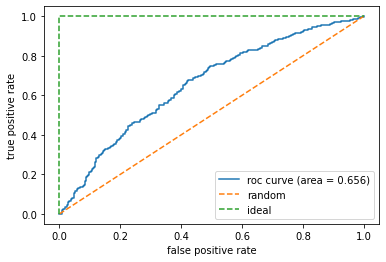

In [12]:
%matplotlib inline
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_score_lr = model_lr.predict_proba(X_test)[:, 1] # 検証データがクラス1に属する確率
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_score_lr)

plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

#### 回帰係数を表示

In [13]:
pd.Series(model_lr.coef_[0], index=X_train.columns).sort_values()

racer_class_1         -0.661708
exhibition_cource_2   -0.188058
flying_4              -0.098626
exhibition_cource_3   -0.086189
flying_3              -0.076617
                         ...   
racer_class_3          0.064455
exhibition_cource_6    0.121158
exhibition_cource_4    0.126551
1着率_1                  0.152429
exhibition_cource_5    0.163051
Length: 115, dtype: float64

### 2.2 RandomForest Classification

In [14]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=100)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

#### 性能評価

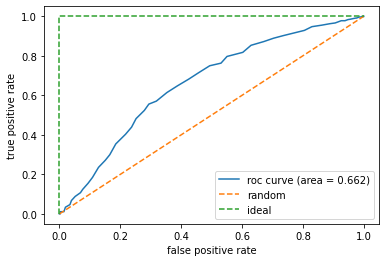

In [15]:
y_score_rf = model_rf.predict_proba(X_test)[:, 1] # 検証データがクラス1に属する確率
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_score_rf)

plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [16]:
# 過学習の確認用
from sklearn.metrics import roc_auc_score

print('auc = ', roc_auc_score(y_true=y_train, y_score=model_rf.predict_proba(X_train)[:, 1] ))

auc =  1.0


#### パラメータ調整

In [17]:
rf_params = {
    "min_samples_split": 600,
    "max_depth": 6,
    "n_estimators": 60,
    "random_state": 100
}
# "criterion": "entropy",
# "class_weight": "balanced",

model_rf = RandomForestClassifier(**rf_params)
model_rf.fit(X_train, y_train)

print('auc_train = ', roc_auc_score(y_true=y_train, y_score=model_rf.predict_proba(X_train)[:, 1]))
print('auc_test = ', roc_auc_score(y_true=y_test, y_score=model_rf.predict_proba(X_test)[:, 1]))

auc_train =  0.7106464243676283
auc_test =  0.679314593941085


#### 回帰係数的なものを算出

In [18]:
pd.DataFrame({"features": X_train.columns, "importance": model_rf.feature_importances_}).sort_values("importance", ascending=False)

,features,importance
2,racer_class_1,0.178202
14,1着率_1,0.176085
17,average_start_time_1,0.066372
15,2着率_1,0.055607
16,3着率_1,0.052500
...,...,...
65,late_4,0.000000
66,tilt_4,0.000000
73,num_late_start_5,0.000000
74,racer_class_5,0.000000


### 2.3 勾配ブースティング木

In [19]:
import lightgbm as lgb
import pickle

params = {"num_leaves": 2,
          "n_estimators": 50,
          "class_weight": "balanced",
          "random_state": 100
         }
# "min_data_in_leaf": 

model_lgb = lgb.LGBMClassifier(**params)
model_lgb.fit(X_train, y_train)

print('auc_train = ', roc_auc_score(y_true=y_train, y_score=model_lgb.predict_proba(X_train)[:, 1]))
print('auc_test = ', roc_auc_score(y_true=y_test, y_score=model_lgb.predict_proba(X_test)[:, 1]))

y_pred_lgb = model_lgb.predict(X_test)
print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=y_pred_lgb))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred_lgb))
print('precision = ', precision_score(y_true=y_test, y_pred=y_pred_lgb))
print('recall = ', recall_score(y_true=y_test, y_pred=y_pred_lgb))
print('f1 score = ', f1_score(y_true=y_test, y_pred=y_pred_lgb))

auc_train =  0.6953814820025874
auc_test =  0.6801608890748878
confusion matrix = 
 [[227 178]
 [155 376]]
accuracy =  0.6442307692307693
precision =  0.6787003610108303
recall =  0.7080979284369114
f1 score =  0.6930875576036867


#### 回帰係数的な

In [20]:
pd.DataFrame({"features": X_train.columns, "importance": model_lgb.feature_importances_}).sort_values("importance", ascending=False)

,features,importance
2,racer_class_1,13
14,1着率_1,8
27,exhibition_cource_2,4
51,2着率_3,4
7,exhibitionTime_1,3
...,...,...
39,ボート2連率_3,0
38,racer_class_3,0
37,num_late_start_3,0
36,num_false_start_3,0


#### 学習曲線

In [21]:
import numpy as np
from sklearn.model_selection import learning_curve

# サンプル数300刻みで検証する
train_sizes = np.arange(300, len(X_train), 300)

train_sizes, train_scores, test_scores = learning_curve(
    model_lgb, X, y, train_sizes=train_sizes, random_state=100, shuffle=False
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

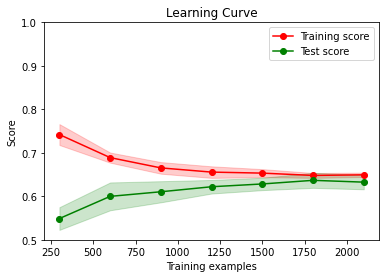

In [22]:
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

# Traing score と Test score をプロット
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test score")

# 標準偏差の範囲を色付け
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="r", alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color="g", alpha=0.2)

plt.ylim(0.5, 1)
plt.legend(loc="best")

plt.show()

## 3. 回収率計算に用いるため、Light GBMの予測結果をdfにして出力

In [23]:
# 3.1 merged_dfをトレーニングデータ・テストデータと同じようにsplitし、indexを作成する
for_index_df = train_test_split(race_df_merged, shuffle=False, test_size=0.3)
output_df_train = for_index_df[0][["date", "venue", "raceNumber"]]
output_df_test = for_index_df[1][["date", "venue", "raceNumber"]]

# 3.2 Light GBMの予測結果をそれぞれ格納
output_df_train["predict_proba_frame_1"] = model_lgb.predict_proba(X_train)[:, 1]
output_df_test["predict_proba_frame_1"] = model_lgb.predict_proba(X_test)[:, 1]

<ipython-input-23-4919f2c81c82>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_df_train["predict_proba_frame_1"] = model_lgb.predict_proba(X_train)[:, 1]
<ipython-input-23-4919f2c81c82>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_df_test["predict_proba_frame_1"] = model_lgb.predict_proba(X_test)[:, 1]


In [24]:
# 確認用
output_df_train

,date,venue,raceNumber,predict_proba_frame_1
0,2021-03-16,びわこ,1.0,0.483465
1,2021-03-16,びわこ,2.0,0.521268
2,2021-03-16,びわこ,3.0,0.542669
3,2021-03-16,びわこ,4.0,0.376372
4,2021-03-16,びわこ,5.0,0.528085
...,...,...,...,...
2178,2021-03-30,多摩川,11.0,0.473291
2179,2021-03-30,多摩川,12.0,0.676904
2180,2021-03-30,大 村,1.0,0.476030
2181,2021-03-30,大 村,2.0,0.389549


In [25]:
# 3.3 pickleファイルにして出力
output_df_train.to_pickle('predict_proba_train_frame_1.pkl')
output_df_test.to_pickle('predict_proba_test_frame_1.pkl')